In [1]:
import pandas as pd
import urllib
from pprint import pprint as pp
import json

In [2]:
import sys
sys.executable

'/Users/martin/opt/anaconda3/envs/babies/bin/python'

In [7]:
sys.path

['/Users/martin/Documents/projects/baby_names',
 '/Users/martin/miniforge3/envs/demo-env/lib/python39.zip',
 '/Users/martin/miniforge3/envs/demo-env/lib/python3.9',
 '/Users/martin/miniforge3/envs/demo-env/lib/python3.9/lib-dynload',
 '',
 '/Users/martin/miniforge3/envs/demo-env/lib/python3.9/site-packages',
 '/Users/martin/miniforge3/envs/demo-env/lib/python3.9/site-packages/IPython/extensions',
 '/Users/martin/.ipython']

In [ ]:
import re

In [21]:
# download SSA big data map file

data = urllib.request.urlopen("https://www.ssa.gov/data.json").read()

In [22]:
data_json = json.loads(data)

In [35]:
KEYWORD = "census"

# Figure out what to extract from the files
for x in data_json['dataset']:
    if (KEYWORD in x['title'].lower()) or (KEYWORD in x['keyword']):
        pp(x)

{'accessLevel': 'non-public',
 'accrualPeriodicity': None,
 'bureauCode': ['016:00'],
 'conformsTo': None,
 'contactPoint': {'fn': 'Data Administrator',
                  'hasEmail': 'mailto:da.mailbox@ssa.gov'},
 'dataQuality': None,
 'describedBy': None,
 'description': 'A central place for congressional  data, zip code, census, '
                'etc',
 'distribution': None,
 'identifier': 'US-GOV-SSA-13',
 'isPartOf': None,
 'keyword': ['census', 'congressional district', 'congress'],
 'landingPage': None,
 'language': None,
 'license': 'https://www.usa.gov/publicdomain/label/1.0/',
 'modified': '2021-11-29',
 'primaryITInvestmentUII': None,
 'programCode': ['016:000'],
 'publisher': {'name': 'Social Security Administration'},
 'rights': 'The publishing of the data asset cannot be done due to one or more '
           'of the following reasons: contains personal identifying '
           'information, contains federal tax information, contains sensitive '
           'information, or 

In [4]:
# Get zipfile of baby names
#https://stackoverflow.com/a/65106410/5650506

import requests, zipfile, io
r = requests.get('https://www.ssa.gov/oact/babynames/names.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./data/")

In [14]:
# put the txt file contents into a dataframe
# https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns

import os

df = pd.DataFrame()

for x in os.listdir("./data/"):
    if x[-4:] == ".txt":
        with open(f"./data/{x}") as f:
            current_file_df = pd.DataFrame(f.readlines()) #todo why not read_csv
            current_file_df[0] = current_file_df[0].str.replace('\n', '')
            current_file_df["year"] = x[3:-4]
            current_file_df[["name","sex","number"]] = current_file_df[0].str.split(",",3, expand=True)
            current_file_df["number"] = pd.to_numeric(current_file_df["number"])
            current_file_df["name"] = current_file_df["name"].str.lower()
            current_file_df[0]
            df = pd.concat(
                [df, current_file_df],
                ignore_index=True
            )
        #break
    #break

In [17]:
df = df.drop(0, axis=1)  # remove the original column we took the date from

In [18]:
df.head()

,year,name,sex,number
0,2000,emily,F,25957
1,2000,hannah,F,23084
2,2000,madison,F,19968
3,2000,ashley,F,17997
4,2000,sarah,F,17706


In [19]:
df.to_pickle("all-names.pkl")

In [9]:
df_boys = df[(df['sex'] == "M")]
df_boys

,0,year,name,sex,number
17658,"Jacob,M,34483",2000,jacob,M,34483
17659,"Michael,M,32039",2000,michael,M,32039
17660,"Matthew,M,28573",2000,matthew,M,28573
17661,"Joshua,M,27537",2000,joshua,M,27537
17662,"Christopher,M,24933",2000,christopher,M,24933
...,...,...,...,...,...
2020858,"Zyheem,M,5",2019,zyheem,M,5
2020859,"Zykel,M,5",2019,zykel,M,5
2020860,"Zyking,M,5",2019,zyking,M,5
2020861,"Zyn,M,5",2019,zyn,M,5


In [10]:
df_girls = df[(df['sex'] == "F")]
df_girls

,0,year,name,sex,number
0,"Emily,F,25957",2000,emily,F,25957
1,"Hannah,F,23084",2000,hannah,F,23084
2,"Madison,F,19968",2000,madison,F,19968
3,"Ashley,F,17997",2000,ashley,F,17997
4,"Sarah,F,17706",2000,sarah,F,17706
...,...,...,...,...,...
2006776,"Zyliyah,F,5",2019,zyliyah,F,5
2006777,"Zymia,F,5",2019,zymia,F,5
2006778,"Zyna,F,5",2019,zyna,F,5
2006779,"Zynlee,F,5",2019,zynlee,F,5


In [11]:
df_martin = df[(df['name'] == "martin") & (df['sex'] == "M")]
df_sadie = df[(df['name'] == "sadie") & (df['sex'] == "F")]
df_1880_girls = df[(df['year'] == "1880") & (df['number'].astype(int) < 320) & (df['sex'] == "F")]

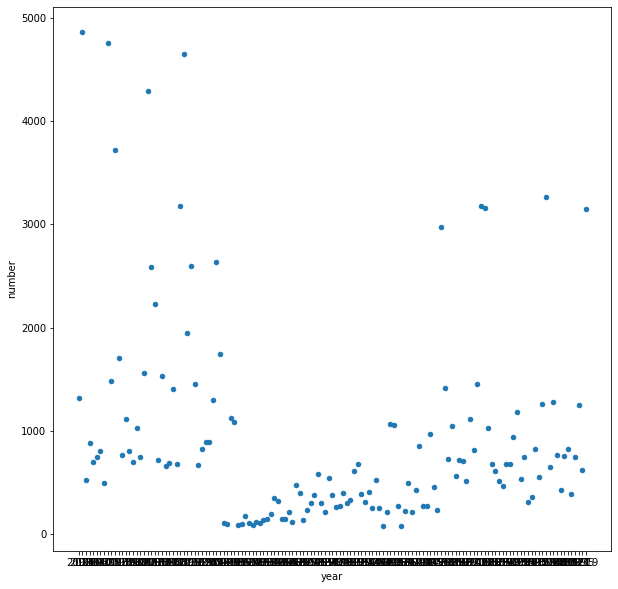

In [25]:
df_sadie.plot.scatter(x="year", y="number", figsize=(10,10))

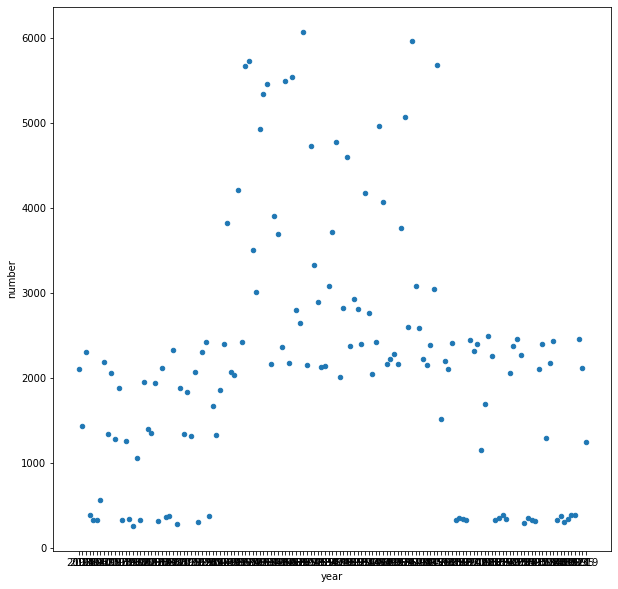

In [12]:
df_martin.plot.scatter(x="year", y="number",figsize=(10,10))

In [13]:
f_martin = df[(df['name'] == "martin") & (df['sex'] == "F")]
m_sadie = df[(df['name'] == "sadie") & (df['sex'] == "M")]